# Apply Method in Pandas
- Check versions of imported libs: "pd.__version__", "np.__version__"
- Shift + Tab +Tab +Tab --> to get documentation of Functions/Methods

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_file = 'E:\\HSBC\\DA Training\\Day 4\\titanic_train.csv'
train = pd.read_csv(data_file)
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
def alone_or_not(cols):
    SibSp = cols[0]
    Parch = cols[1]
    notalone = SibSp + Parch
    if notalone > 0:
        return 0
    else: return 1

In [4]:
train['Alone'] = train[['SibSp','Parch']].apply(alone_or_not, axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
train.drop('Alone',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
def check_alone(cols):
    if cols>0:
        return 1
    else: return 0

train['Alone'] = train['SibSp'] + train['Parch']
train['Alone'].apply(check_alone)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Alone, Length: 891, dtype: int64

# Set Index, Reset Index, Renaming the Columns

In [7]:
np.random.seed(100)
arr = np.random.randn(4,4).round(2)
arr

array([[-1.75,  0.34,  1.15, -0.25],
       [ 0.98,  0.51,  0.22, -1.07],
       [-0.19,  0.26, -0.46,  0.44],
       [-0.58,  0.82,  0.67, -0.1 ]])

In [8]:
df = pd.DataFrame(arr, columns="W X Y Z".split(), \
                 index = ['India','US','Japan','Germany'])
df

,W,X,Y,Z
India,-1.75,0.34,1.15,-0.25
US,0.98,0.51,0.22,-1.07
Japan,-0.19,0.26,-0.46,0.44
Germany,-0.58,0.82,0.67,-0.10


# reset_index()

In [9]:
df.reset_index(drop=True,inplace=True) # "drop" is for new col to be added/set and prev col to be dropped or not
df

,W,X,Y,Z
0,-1.75,0.34,1.15,-0.25
1,0.98,0.51,0.22,-1.07
2,-0.19,0.26,-0.46,0.44
3,-0.58,0.82,0.67,-0.10


In [10]:
df['States'] = ['Maha','MP','AP','UP']
df

,W,X,Y,Z,States
0,-1.75,0.34,1.15,-0.25,Maha
1,0.98,0.51,0.22,-1.07,MP
2,-0.19,0.26,-0.46,0.44,AP
3,-0.58,0.82,0.67,-0.10,UP


# set_index()

In [11]:
df1 = df.copy()
df1.set_index('States',drop=True,append=False,inplace=True)
df1

# "append" is for new col to be appended as a Secondary index
# df1.set_index('States',drop=True,append=True,inplace=True)
# df1.index

,W,X,Y,Z
States,,,,
Maha,-1.75,0.34,1.15,-0.25
MP,0.98,0.51,0.22,-1.07
AP,-0.19,0.26,-0.46,0.44
UP,-0.58,0.82,0.67,-0.10


# rename()

In [12]:
df1.rename({'Z':'Zelius','Y':'Yolo'},axis=1)

,W,X,Yolo,Zelius
States,,,,
Maha,-1.75,0.34,1.15,-0.25
MP,0.98,0.51,0.22,-1.07
AP,-0.19,0.26,-0.46,0.44
UP,-0.58,0.82,0.67,-0.10


# Handling Missing data (with isna/dropna/fillna)

## isna()

In [13]:
train.isna().sum() #isnull() was used in Python old versions
train['Age'].isna().sum()

177

## dropna()

In [14]:
d1 = {'A':[np.nan,2,4], 'B':[np.nan,np.nan,np.nan], 'C':[2,np.nan,np.nan]}
df1 = pd.DataFrame(d1)
df1

,A,B,C
0,NaN,NaN,2.0
1,2.0,NaN,NaN
2,4.0,NaN,NaN


In [15]:
df1.dropna(axis=1)
df1.dropna(axis=0,how='any')

,A,B,C


In [16]:
df1.dropna(axis=1,how='all')

,A,C
0,NaN,2.0
1,2.0,NaN
2,4.0,NaN


In [17]:
df1.dropna(axis=1,how='any',thresh=2) # Does not drop anything;It retains those rows/cols that have at least 2 Non-NaN values

,A
0,NaN
1,2.0
2,4.0


# fillna()

In [18]:
df1.fillna('kuch bhi')
#df1['B'].fillna('kuch bhi')
df1

,A,B,C
0,NaN,NaN,2.0
1,2.0,NaN,NaN
2,4.0,NaN,NaN


In [19]:
df1.describe()

,A,B,C
count,2.000000,0.0,1.0
mean,3.000000,NaN,2.0
std,1.414214,NaN,NaN
min,2.000000,NaN,2.0
25%,2.500000,NaN,2.0
50%,3.000000,NaN,2.0
75%,3.500000,NaN,2.0
max,4.000000,NaN,2.0


In [20]:
df1['A'].fillna(value=df1['A'].mean(), inplace=True)
df1

,A,B,C
0,3.0,NaN,2.0
1,2.0,NaN,NaN
2,4.0,NaN,NaN


In [21]:
df2 = pd.read_excel('sample.xlsx', na_values=['na','n.a.','N.A.'], keep_default_na=True) 
# keep_default_na is to also recognize the NaN interpretations; else only na_values are considered
df2

,A,B,C,D
0,2,20.0,NaN,NaN
1,3,NaN,NaN,30.0
2,4,NaN,NaN,40.0
3,5,50.0,NaN,NaN


In [22]:
# Approach 1
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        if pclass == 1:
            return train.groupby(by='Pclass')['Age'].mean().round(2)[1]
        elif pclass == 2:
            return train.groupby(by='Pclass')['Age'].mean().round(2)[2]
        else:
            return train.groupby(by='Pclass')['Age'].mean().round(2)[3]
    else: return age
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.head(10)
# train.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,25.14,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,1


In [23]:
# Approach 2
means = train.groupby(by='Pclass')['Age'].mean().round(2)
Pclass_means = means.to_dict()
Pclass_means

for i in train['Pclass']:
    train['Age'].fillna(value=Pclass_means[i],inplace=True)
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q,0


In [24]:
# Approach 3
train['Age'] = train.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.mean()))
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q,0


In [25]:
# Approach 4
# means = train.groupby(by='Pclass')['Age'].mean().round(2)
# Pclass_means = means.to_dict()
# Pclass_means

# train['Age'].fillna(value=lambda train['Pclass'] : for i in )
# train.head(10)

In [26]:
Bharti = pd.read_csv('hist_df_latest.csv')
Bharti

,date,open,high,low,close,volume,RSI_14,EMA_3,EMA_7,EMA_10,EMA_14,EMA_21
0,2020-05-08 09:15:00+05:30,536.90,537.05,532.80,535.60,1269786,65.828950,532.481561,530.941617,530.518343,530.260484,530.270784
1,2020-05-08 09:20:00+05:30,536.00,536.90,532.60,533.95,753357,59.676243,533.215780,531.693713,531.142281,530.752419,530.605258
2,2020-05-08 09:25:00+05:30,533.95,535.40,532.40,533.35,559002,57.569115,533.282890,532.107784,531.543684,531.098763,530.854780
3,2020-05-08 09:30:00+05:30,533.35,540.60,533.25,540.00,1564095,70.149544,536.641445,534.080838,533.081196,532.285595,531.686164
4,2020-05-08 09:35:00+05:30,540.05,542.40,537.25,542.00,1190193,72.764925,539.320723,536.060629,534.702797,533.580849,532.623785
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2020-05-08 15:05:00+05:30,529.50,529.95,529.05,529.75,257289,33.632540,529.797384,530.356474,530.861323,531.547410,532.677937
71,2020-05-08 15:10:00+05:30,529.70,529.75,528.25,528.60,460899,30.560595,529.198692,529.917356,530.450173,531.154422,532.307215
72,2020-05-08 15:15:00+05:30,528.60,529.60,528.60,528.95,394263,32.578980,529.074346,529.675517,530.177414,530.860499,532.002014
73,2020-05-08 15:20:00+05:30,529.05,529.05,527.70,528.00,616383,30.027688,528.537173,529.256638,529.781521,530.479099,531.638195


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

Bharti['Hour'] = pd.to_datetime(Bharti['date'])
Bharti['Hour']

0    2020-05-08 09:15:00+05:30
1    2020-05-08 09:20:00+05:30
2    2020-05-08 09:25:00+05:30
3    2020-05-08 09:30:00+05:30
4    2020-05-08 09:35:00+05:30
                ...           
70   2020-05-08 15:05:00+05:30
71   2020-05-08 15:10:00+05:30
72   2020-05-08 15:15:00+05:30
73   2020-05-08 15:20:00+05:30
74   2020-05-08 15:25:00+05:30
Name: Hour, Length: 75, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [28]:
dt=pd.to_datetime(['2020-05-08 ' + str(i) +':00:00+05:30' for i in range(9,16)])
dt

DatetimeIndex(['2020-05-08 09:00:00+05:30', '2020-05-08 10:00:00+05:30',
               '2020-05-08 11:00:00+05:30', '2020-05-08 12:00:00+05:30',
               '2020-05-08 13:00:00+05:30', '2020-05-08 14:00:00+05:30',
               '2020-05-08 15:00:00+05:30'],
              dtype='datetime64[ns, pytz.FixedOffset(330)]', freq=None)

No handles with labels found to put in legend.


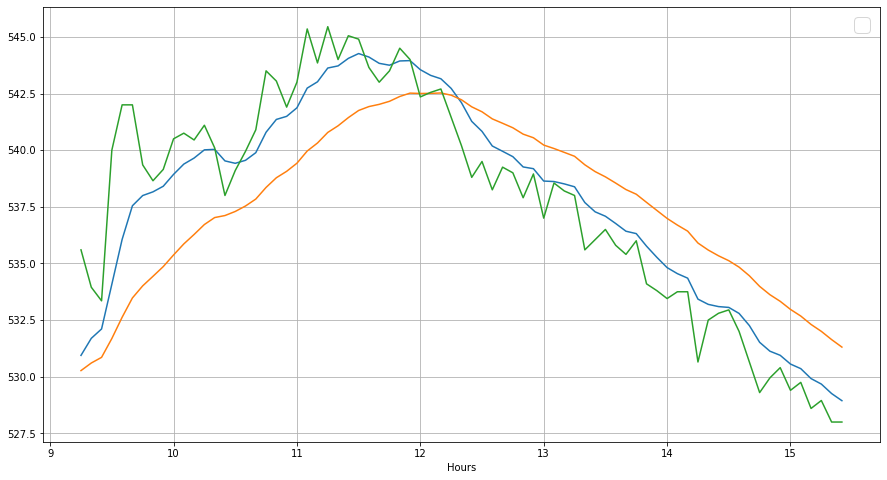

In [29]:
plt.figure(figsize=(15,8))
plt.plot(Bharti['Hour'],Bharti['EMA_7'])
plt.plot(Bharti['Hour'],Bharti['EMA_21'])
plt.plot(Bharti['Hour'],Bharti['close'])
plt.legend(fontsize=20)
plt.xticks(ticks=dt,labels=list(range(9,16)))
plt.xlabel('Hours')
plt.grid(True)
plt.show()

# plt.plot(Bharti['date'],Bharti['close'])

# Pandas Methods

In [30]:
# pd.concat(df1,df2)
# Labels are not unique; but while fetching, if these are same; then all such rows/cols are fetched as a DataFrame

# These are same
# pd.merge(df1,df2, how='inner',on='key')
# left.join(right)
